# Prepare a prediction model for profit of 50_startups data.

In [3]:
# Loading all Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
# Loading data via pandas
df=pd.read_csv('E://EXCELR//Data science//Data science assignment//5) Multi Linear Regression//50_Startups.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# Rename columns
df.rename(columns={'R&D Spend':'R&D_spend','Marketing Spend':'Marketing_spend'},inplace=True)
df.head(5)

,R&D_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Checking the distribution plot and box plot for outliers

C:\Users\91771\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91771\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91771\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

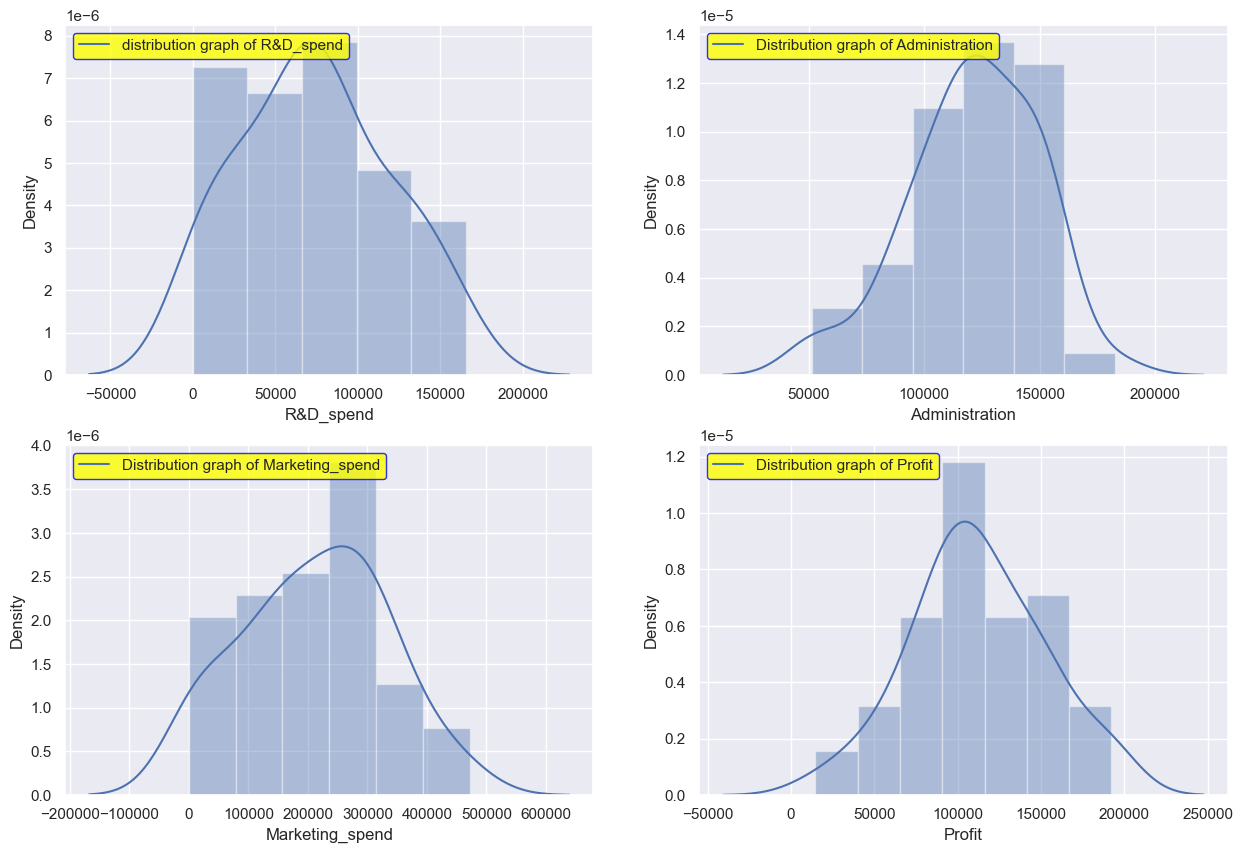

In [9]:
# Visualizing the distribution using histogram
sns.set(rc={'figure.figsize':(15,10)})

# creating first plot
plt.subplot(2,2,1)
ax=sns.distplot(df['R&D_spend'])
plt.legend(['distribution graph of R&D_spend'],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second p;lot
plt.subplot(2,2,2)
ax=sns.distplot(df['Administration'])
plt.legend(['Distribution graph of Administration'],loc='upper left',facecolor='yellow',edgecolor='blue')

# creating the third subplot
plt.subplot(2,2,3)
ax=sns.distplot(df['Marketing_spend'])
plt.legend(['Distribution graph of Marketing_spend'],loc='upper left',facecolor='yellow',edgecolor='blue')

# creating the fourth plot
plt.subplot(2,2,4)
ax=sns.distplot(df['Profit'])
plt.legend(['Distribution graph of Profit'],loc='upper left',facecolor='yellow',edgecolor='blue')


plt.show;

C:\Users\91771\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91771\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91771\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91771\anaconda3\lib\si

Profit column has an outlier


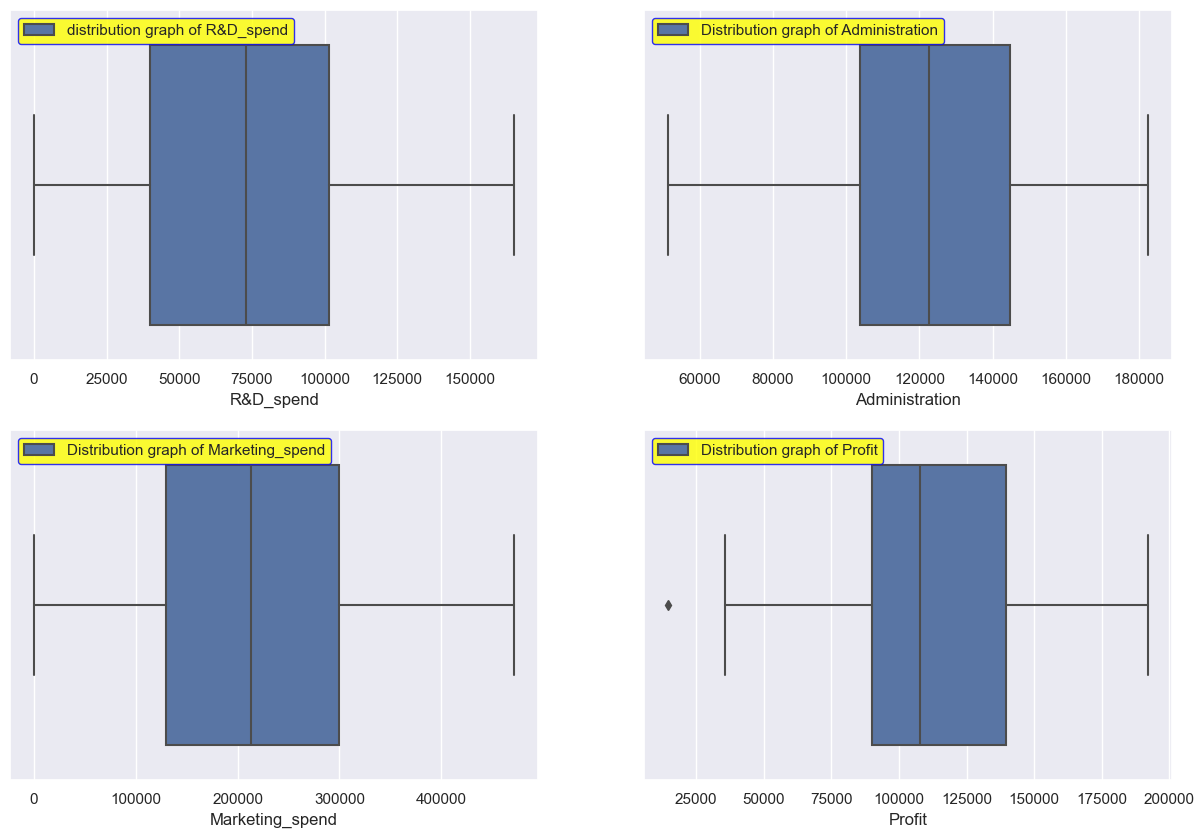

In [11]:
# Visualizing the distribution using histogram
sns.set(rc={'figure.figsize':(15,10)})

# creating first plot
plt.subplot(2,2,1)
ax=sns.boxplot(df['R&D_spend'])
plt.legend(['distribution graph of R&D_spend'],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second p;lot
plt.subplot(2,2,2)
ax=sns.boxplot(df['Administration'])
plt.legend(['Distribution graph of Administration'],loc='upper left',facecolor='yellow',edgecolor='blue')

# creating the third subplot
plt.subplot(2,2,3)
ax=sns.boxplot(df['Marketing_spend'])
plt.legend(['Distribution graph of Marketing_spend'],loc='upper left',facecolor='yellow',edgecolor='blue')

# creating the fourth plot
plt.subplot(2,2,4)
ax=sns.boxplot(df['Profit'])
plt.legend(['Distribution graph of Profit'],loc='upper left',facecolor='yellow',edgecolor='blue')


plt.show;
print('Profit column has an outlier')

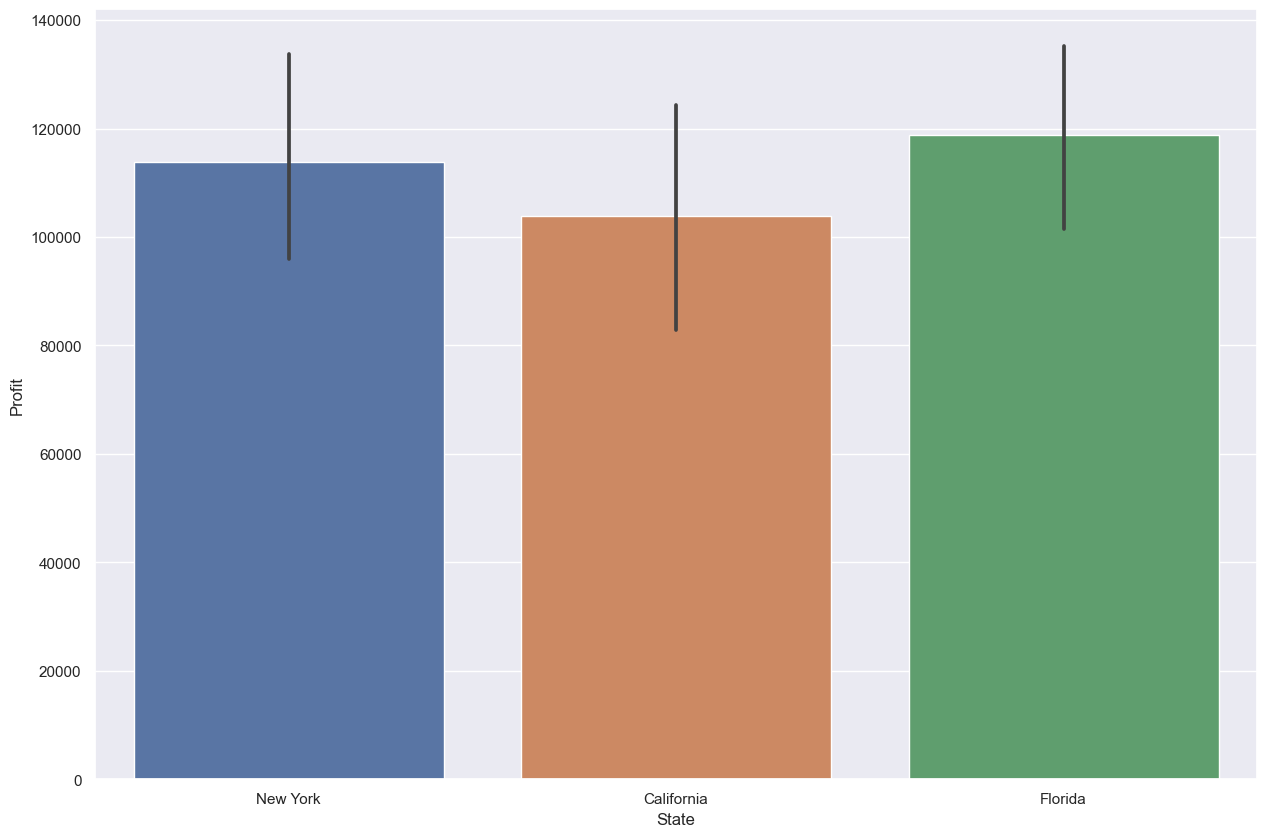

All three states category seems to have more or less same profit levels so state variable cannot be a good predictor for profit.So we will drop it.


In [15]:
# checking relationship between state variable and profit
sns.barplot(x='State',y='Profit',data=df)
plt.show()

print('All three states category seems to have more or less same profit levels so state variable cannot be a good predictor for profit.So we will drop it.')

In [16]:
# Creating new data frame by dropping state variable
df1=df[['R&D_spend','Administration','Marketing_spend','Profit']]
df1.head(5)

,R&D_spend,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [17]:
df1.describe()

,R&D_spend,Administration,Marketing_spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Checking correlation matrix and pairplot

Output variable(Profit) has a high correlation(0.97) with R&D and medium correlation(0.75) with Marketing_Spend and very low correlation(0.2) with Administra


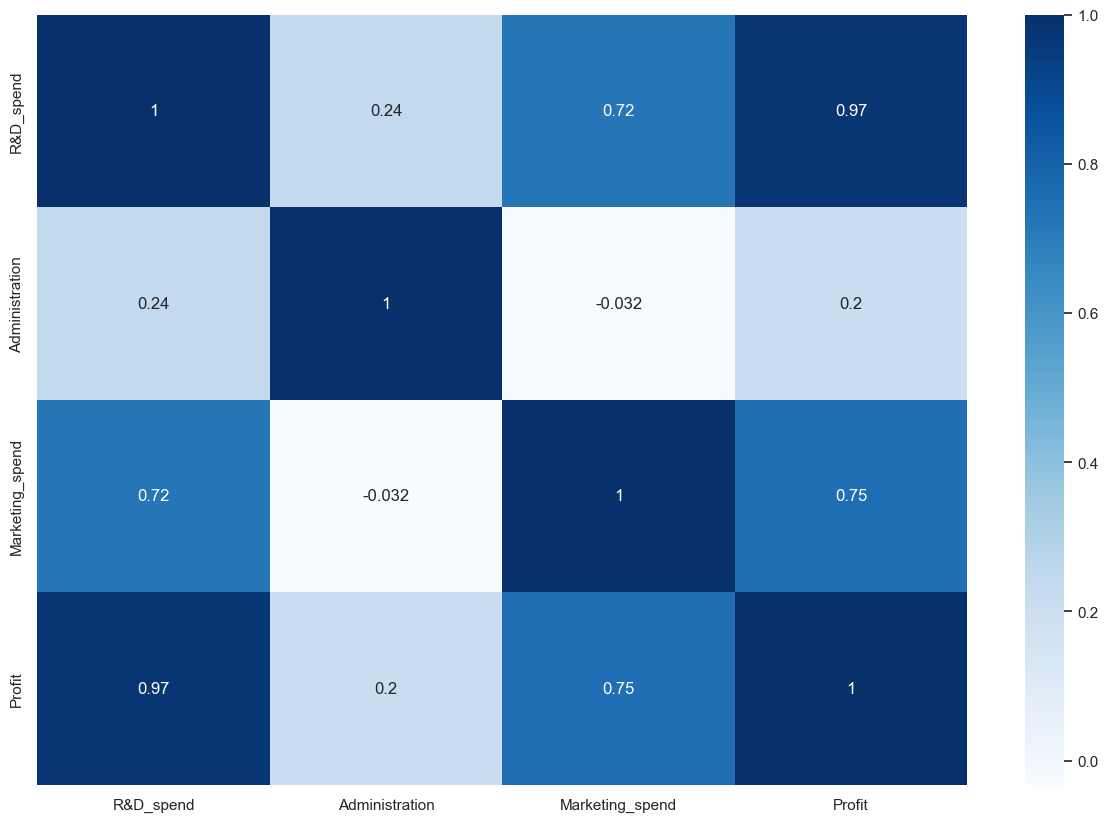

In [19]:
ax=sns.heatmap(df1.corr(),annot=True,cmap='Blues')

print('Output variable(Profit) has a high correlation(0.97) with R&D and medium correlation(0.75) with Marketing_Spend and very low correlation(0.2) with Administra')

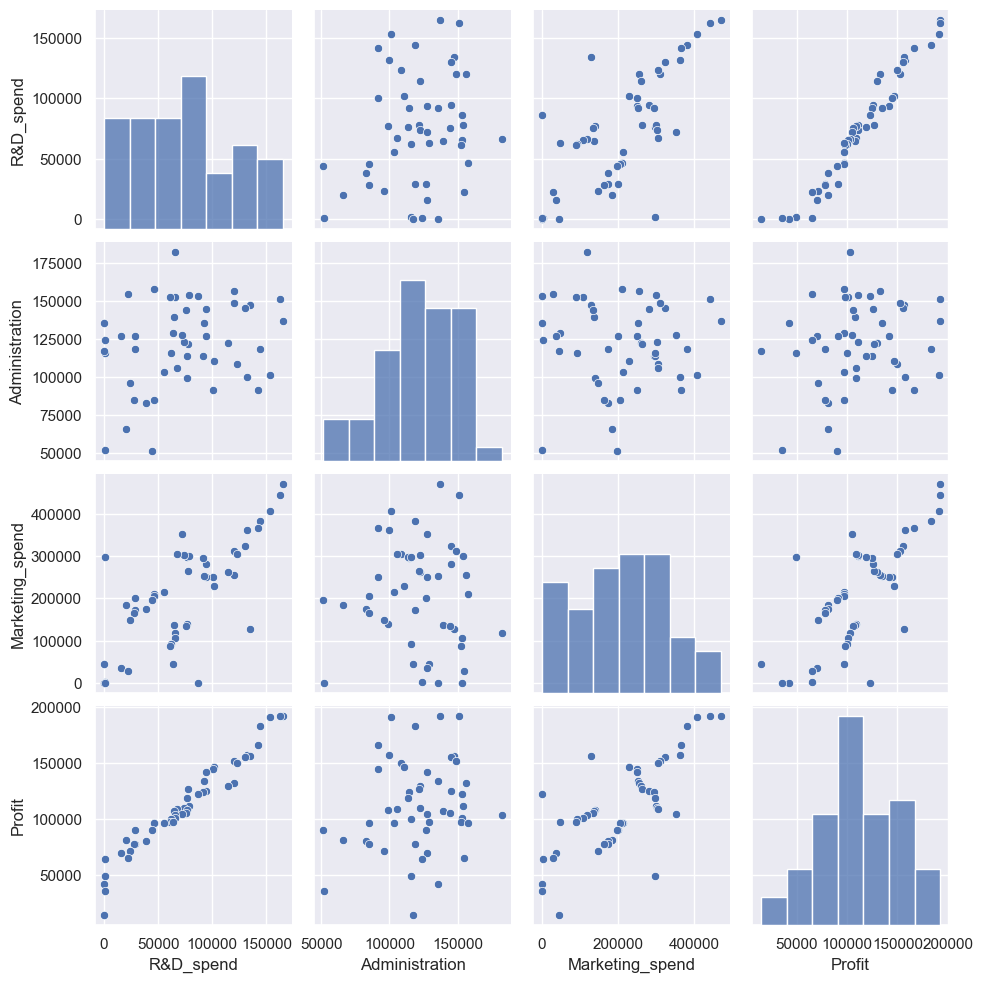

In [24]:
sns.pairplot(df[['R&D_spend','Administration','Marketing_spend','Profit']])

# Standardizaion

In [26]:
array_df1=df1.values
standard_df1=StandardScaler().fit(array_df1).transform(array_df1)
standard_df1[0:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  2.01120333],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.99942997],
       [ 1.75436374, -0.72825703,  1.62652767,  1.98084225],
       [ 1.55478369, -0.09636463,  1.42221024,  1.77662724],
       [ 1.5049372 , -1.07991935,  1.28152771,  1.35774012]])

In [36]:
# creating dataframe of standardized values
df2=pd.DataFrame({'rd_spend':standard_df1[:,0],'administration':standard_df1[:,1],'marketing_spend':standard_df1[:,2],'profit':standard_df1[:,3]})
df2.head()

,rd_spend,administration,marketing_spend,profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


# Feature selecttion

In [37]:
model1=smf.ols('profit~rd_spend',data=df2).fit()
print('p-value:',model1.pvalues)
print('R-squared value:',model1.rsquared)
print('Adjusted R-squared:',model1.rsquared_adj)


print('Here p-value of rd_spend is less than 0.05 so it is significant')

p-value: Intercept    1.000000e+00
rd_spend     3.500322e-32
dtype: float64
R-squared value: 0.9465353160804392
Adjusted R-squared: 0.9454214684987816
Here p-value of rd_spend is less than 0.05 so it is significant


In [39]:
model2=smf.ols('profit~administration',data=df2).fit()
print('p-value:',model2.pvalues)
print('R-squared value:',model2.rsquared)
print('Adjusted R-squared:',model2.rsquared_adj)

print('Here p-value of rd_spend is greater than 0.05 so it is insignificant')

p-value: Intercept         1.000000
administration    0.162217
dtype: float64
R-squared value: 0.04028714077757234
Adjusted R-squared: 0.020293122877105163
Here p-value of rd_spend is greater than 0.05 so it is insignificant


In [40]:
model3=smf.ols('profit~marketing_spend',data=df2).fit()
print('p-value:',model3.pvalues)
print('R-squared value:',model3.rsquared)
print('Adjusted R-squared:',model3.rsquared_adj)

print('Here p-value of rd_spend is greater than 0.05 so it is significant')

p-value: Intercept          1.000000e+00
marketing_spend    4.381073e-10
dtype: float64
R-squared value: 0.5591535746115515
Adjusted R-squared: 0.5499692740826254
Here p-value of rd_spend is greater than 0.05 so it is significant


In [41]:
model4=smf.ols('profit~rd_spend+administration',data=df2).fit()
print('p-value:',model4.pvalues)
print('R-squared value:',model4.rsquared)
print('Adjusted R-squared:',model4.rsquared_adj)

p-value: Intercept         1.000000e+00
rd_spend          2.278348e-31
administration    2.888932e-01
dtype: float64
R-squared value: 0.9478129385009173
Adjusted R-squared: 0.9455922124796797


In [42]:
model5=smf.ols('profit~rd_spend+marketing_spend',data=df2).fit()
print('p-value:',model5.pvalues)
print('R-squared value:',model5.rsquared)
print('Adjusted R-squared:',model5.rsquared_adj)



p-value: Intercept          1.000000e+00
rd_spend           6.040433e-24
marketing_spend    6.003040e-02
dtype: float64
R-squared value: 0.9504503015559763
Adjusted R-squared: 0.9483418037498477


In [43]:
model6=smf.ols('profit~marketing_spend+administration',data=df2).fit()
print('p-value:',model6.pvalues)
print('R-squared value:',model6.rsquared)
print('Adjusted R-squared:',model6.rsquared_adj)



p-value: Intercept          1.000000e+00
marketing_spend    9.727245e-11
administration     1.729198e-02
dtype: float64
R-squared value: 0.6097229746770663
Adjusted R-squared: 0.593115441684601


In [45]:
model7=smf.ols('profit~rd_spend+administration+marketing_spend',data=df2).fit()
print('p-value:',model7.pvalues)
print('R-squared value:',model7.rsquared)
print('Adjusted R-squared:',model7.rsquared_adj)



p-value: Intercept          1.000000e+00
rd_spend           2.634968e-22
administration     6.017551e-01
marketing_spend    1.047168e-01
dtype: float64
R-squared value: 0.9507459940683246
Adjusted R-squared: 0.9475337762901719


# Checking collinearity by calculating VIF score

In [57]:
rsq_rd=smf.ols('rd_spend~marketing_spend+administration',data=df2).fit().rsquared
vif_rd=1/(1-rsq_rd)

rsq_mkt=smf.ols('marketing_spend~rd_spend+administration',data=df2).fit().rsquared
vif_mkt=1/(1-rsq_mkt)

rsq_adm=smf.ols('administration~rd_spend+marketing_spend',data=df2).fit().rsquared
vif_adm=1/(1-rsq_adm)

d1={'Variables':['rd_spend','administration','marketing_spend'],'VIF':[vif_rd,vif_adm,vif_mkt]}
Vif_frame=pd.DataFrame(d1)
Vif_frame



,Variables,VIF
0,rd_spend,2.468903
1,administration,1.175091
2,marketing_spend,2.326773


# calculating RMSE for all models

In [59]:
pred1=model1.predict()
rmse1=np.sqrt(mean_squared_error(df2.profit,pred1))
print('RMSE for model1 is :',rmse1)

RMSE for model1 is : 0.2312243151564316


In [61]:
pred2=model2.predict()
rmse2=np.sqrt(mean_squared_error(df2.profit,pred2))
print('RMSE for model 2 is :',rmse2)

RMSE for model 2 is : 0.9796493552401428


In [62]:
pred3=model3.predict()
rmse3=np.sqrt(mean_squared_error(df2.profit,pred3))
print('RMSE for model 3 is :',rmse3)

RMSE for model 3 is : 0.6639626686707985


In [63]:
pred4=model4.predict()
rmse4=np.sqrt(mean_squared_error(df2.profit,pred4))
print('RMSE for model 4 is :',rmse4)

RMSE for model 4 is : 0.22844487628109053


In [64]:
pred5=model5.predict()
rmse5=np.sqrt(mean_squared_error(df2.profit,pred5))
print('RMSE for model 5 is :',rmse5)

RMSE for model 5 is : 0.22259761553984297


In [65]:
pred6=model6.predict()
rmse6=np.sqrt(mean_squared_error(df2.profit,pred6))
print('RMSE for model 6 is :',rmse6)

RMSE for model 6 is : 0.6247215582344935


In [66]:
pred7=model7.predict()
rmse7=np.sqrt(mean_squared_error(df2.profit,pred7))
print('RMSE for mode 7 is :',rmse7)

RMSE for mode 7 is : 0.2219324355106198


 RMSE values of model 6 and 8 are almost similar

In [75]:
d={'Models':['rd spend','administration','marketing spend','rd spend+ administration','rd_spend+marketing_spend','administration+marketing spend','rd_spend+marketing_spend+administration'],
   'R-squared values':[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared],
   'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7]}
df_result=pd.DataFrame(d)
df_result


,Models,R-squared values,RMSE
0,rd spend,0.946535,0.231224
1,administration,0.040287,0.979649
2,marketing spend,0.559154,0.663963
3,rd spend+ administration,0.947813,0.228445
4,rd_spend+marketing_spend,0.950450,0.222598
5,administration+marketing spend,0.609723,0.624722
6,rd_spend+marketing_spend+administration,0.950746,0.221932


In [78]:
p={'Models':['rd spend','administration','marketing spend','rd spend+ administration','rd_spend+marketing_spend','administration+marketing spend','rd_spend+marketing_spend+administration'],
   'R-squared values':[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared],
   'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7]}
df=pd.DataFrame(p)
df


,Models,R-squared values,RMSE
0,rd spend,0.946535,0.231224
1,administration,0.040287,0.979649
2,marketing spend,0.559154,0.663963
3,rd spend+ administration,0.947813,0.228445
4,rd_spend+marketing_spend,0.950450,0.222598
5,administration+marketing spend,0.609723,0.624722
6,rd_spend+marketing_spend+administration,0.950746,0.221932


In [79]:
# merging into dataframes
df_model=pd.merge(df_result,df)
df_model

,Models,R-squared values,RMSE
0,rd spend,0.946535,0.231224
1,administration,0.040287,0.979649
2,marketing spend,0.559154,0.663963
3,rd spend+ administration,0.947813,0.228445
4,rd_spend+marketing_spend,0.950450,0.222598
5,administration+marketing spend,0.609723,0.624722
6,rd_spend+marketing_spend+administration,0.950746,0.221932


# 4th and 6th model have the highest R-squared values and lowest errors.

# As adding variables always slightly increases R-squared values , 4th model can be better than 6th one as 6th has all three input variables so may be that is contributing to high R-squared values .

# Also the P-values for model 4 is less compared to model 6 indicating that the variables in model 4 are more significant than in model 6.So safe bet is model 4.

# So the best model for predicting profit will be the one having only two predictor variables : rd_spend and marketing_spend.
